In [222]:
# read data
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import pandas as pd
B = pd.read_csv('Sleep_Study_Dec2020.xlsx - Bozie.csv').dropna(axis="columns", how='all') 
R = pd.read_csv('Sleep_Study_Dec2020.xlsx - Rani.csv').dropna(axis="columns", how='all')
P = pd.read_csv('Sleep_Study_Dec2020.xlsx - Spike.csv').dropna(axis="columns", how='all')
K = pd.read_csv('Sleep_Study_Dec2020.xlsx - Kamala.csv').dropna(axis="columns", how='all')
W = pd.read_csv('Sleep_Study_Dec2020.xlsx - Swarna.csv').dropna(axis="columns", how='all')

In [161]:
droptimes = [72120,79320, 86520,106320]

In [191]:
def converttime(string):
    (h, m, s) = string.split(':')
    if (int(h) < 12): h= int(h) + 24 
    return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
#B.loc[:,'Start DTime'] = pd.to_datetime(B.Date + ' '+ B["Start Time"])

## Bozie

In [242]:
%%capture 
B["Start T"] = [0]*len(B)
B["Stop T"] = [0]*len(B)
for i,x in B.iterrows():
    B["Start T"][i] = converttime(x["Start Time"])
    B["Stop T"][i] = converttime(x["Stop Time"])
    
B_down = B[B["Rest/Recumbent"] == "Recumbent"]

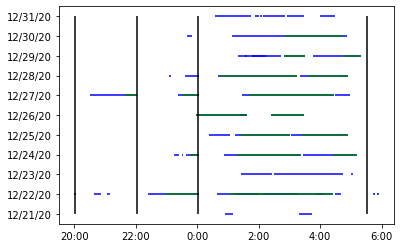

In [243]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plt.hlines("Date", "Start T","Stop T",data=B,color="blue")
ax = plt.hlines("Date", "Start T","Stop T",data=B_down,color="green")
ax = plt.vlines(droptimes,0,10,color="k")
ax = plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))

## Rani

In [244]:
%%capture
R["Start T"] = [0]*len(R)
R["Stop T"] = [0]*len(R)
for i,x in R.iterrows():
    R["Start T"][i] = converttime(x["Start Time"])
    R["Stop T"][i] = converttime(x["Stop Time"])
    
R_down = R[R["Rest/Recumbent"] == "Recumbent"]

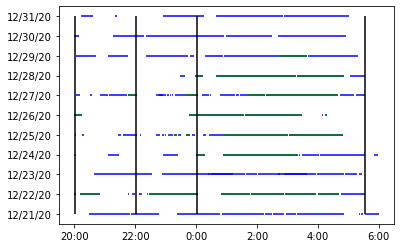

In [246]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plt.hlines("Date", "Start T","Stop T",data=R,color="blue")
ax = plt.hlines("Date", "Start T","Stop T",data=R_down,color="green")
ax = plt.vlines(droptimes,0,10,color="k")
ax = plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))

In [247]:
%%capture
P["Start T"] = [0]*len(P)
P["Stop T"] = [0]*len(P)
for i,x in P.iterrows():
    print(i)
    P["Start T"][i] = converttime(x["Start Time"])
    P["Stop T"][i] = converttime(x["Stop Time"])
    
P_down = P[P["Rest/Recumbent"] == "Recumbent"]

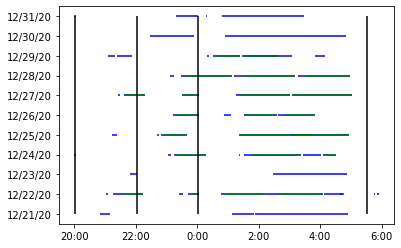

In [248]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plt.hlines("Date", "Start T","Stop T",data=P,color="blue")
ax = plt.hlines("Date", "Start T","Stop T",data=P_down,color="green")
ax = plt.vlines(droptimes,0,10,color="k")
ax = plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))

## Kamala

In [249]:
%%capture
K["Start T"] = [0]*len(K)
K["Stop T"] = [0]*len(K)
for i,x in K.iterrows():
    print(i)
    K["Start T"][i] = converttime(x["Start Time"])
    K["Stop T"][i] = converttime(x["Stop Time"])
    
K_down = K[K["Rest/Recumbent"] == "Recumbent"]

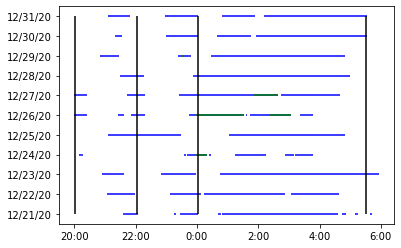

In [250]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plt.hlines("Date", "Start T","Stop T",data=K,color="blue")
ax = plt.hlines("Date", "Start T","Stop T",data=K_down,color="green")
ax = plt.vlines(droptimes,0,10,color="k")
ax = plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))

In [251]:
%%capture
W["Start T"] = [0]*len(W)
W["Stop T"] = [0]*len(W)
for i,x in W.iterrows():
    print(i)
    W["Start T"][i] = converttime(x["Start Time"])
    W["Stop T"][i] = converttime(x["Stop Time"])
    
W_down = W[W["Rest/Recumbent"] == "Recumbent"]

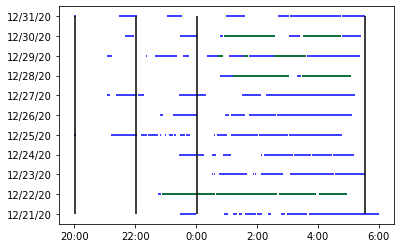

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plt.hlines("Date", "Start T","Stop T",data=W,color="blue")
ax = plt.hlines("Date", "Start T","Stop T",data=W_down,color="green")
ax = plt.vlines(droptimes,0,10,color="k")
ax = plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))